In [19]:
import pandas as pd
import plotly.express as px
import json
import plotly.graph_objects as go

In [20]:
import sys
if sys.platform=='win32':
    dots='..'
else:
    dots='.'
dirs=['Jonas','Alexej']
for d in dirs:
    sys.path.insert(0, f'{dots}/{d}')
import importjvk as ijvk
data= ijvk.get_data()
df=data[1]
print(data[1].head())

InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `get_data()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function get_data at 0x0000018391B8A320>
```

Please see the `hash_funcs` [documentation]
(https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

In [22]:
df = pd.read_csv("data/nuclear_weapons_tests_states.csv")

In [23]:
df.head()

,country_name,year,nuclear_weapons_tests
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0


In [118]:
df[df.country_name == "Russia"]

,country_name,year,nuclear_weapons_tests
375,Russia,1945,0
376,Russia,1946,0
377,Russia,1947,0
378,Russia,1948,0
379,Russia,1949,1
...,...,...,...
445,Russia,2015,0
446,Russia,2016,0
447,Russia,2017,0
448,Russia,2018,0


In [24]:
df.columns

Index(['country_name', 'year', 'nuclear_weapons_tests'], dtype='object')

In [25]:
df2 = df[["country_name","nuclear_weapons_stockpile","year"]][df["nuclear_weapons_stockpile"] > 0].copy()
df2.head()

KeyError: "['nuclear_weapons_stockpile'] not in index"

In [ ]:
df3 = df[["country_name","nuclear_weapons_tests","year"]][df["nuclear_weapons_tests"] > 0].copy()
df3.head()

In [ ]:
fig = go.Figure(data=go.Scatter(
    x=df2["year"],
    y=df2["nuclear_weapons_stockpile"],
    mode="lines",
    #marker_color=df2["country_name"],
    #colorscale="Viridis",
    #marker=(dict(colorscale="Viridis")),
    #name=name, # legend
    #text=data # hover text
))

fig.update_layout(title="Estimated nuclear warhead stockpiles, 1945 to 2022")

fig.show()

In [ ]:
?go.Scatter.marker

In [ ]:
df3.head()

In [ ]:
fig2 = go.Figure()

# for loop tba

# traceS ??? tba

fig2.add_trace(go.Bar(
    x=df3["year"],
    y=df3["nuclear_weapons_tests"],
    #name=name,
    #hovertext=hovertext, # list ?
))
# 
#fig.update_traces(
#    marker_color=df3["country_name"].unique(),
#    #marker_line_color=marker_line_color,
#    marker_line_width=1.5,
#    opacity=0.6,
#)
    
for country in df3["country_name"].unique():
    df3_sub = df3[df3["country_name"]==country]
    fig2.add_traces(go.Bar(
        x=df3["year"],
        y=df3["nuclear_weapons_tests"],
        marker_color=
        #name=name,
        #hovertext=hovertext, # list ?
    
fig2.update_layout(
    barmode="stack",
    title_text="Number of nuclear weapons tests, 1945 to 2019",
)
              
fig2.show()              

In [ ]:
?go.Bar

In [26]:
df3 = df

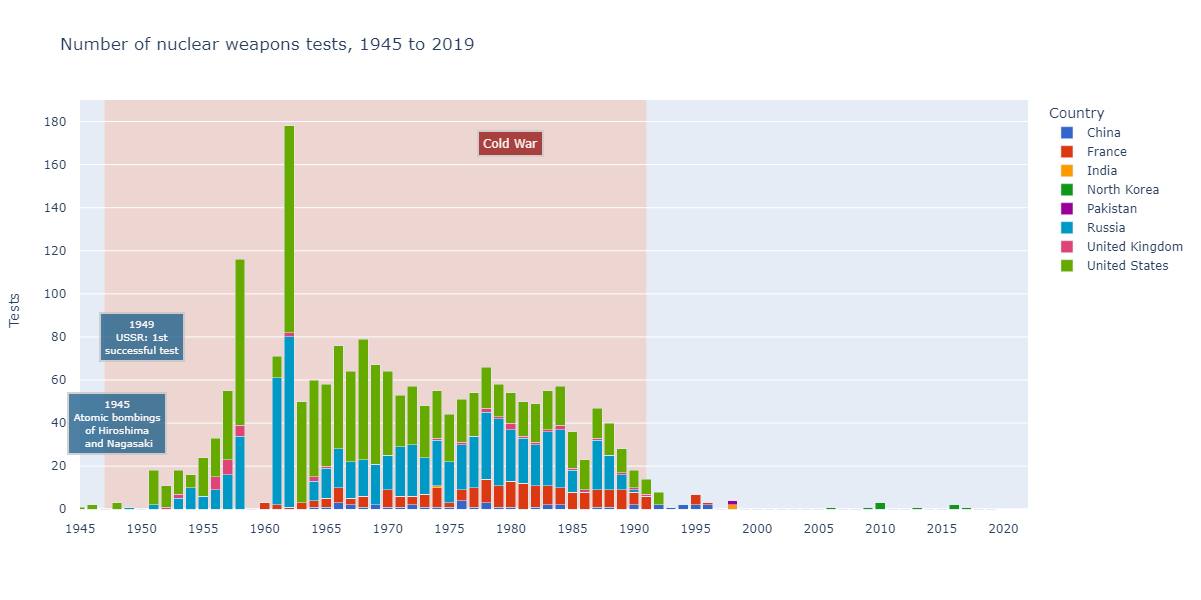

In [172]:
fig3 = px.bar(
    data_frame=df3.sort_values(by=["country_name"]),
    x=df3["year"],
    y=df3["nuclear_weapons_tests"],
    color=df3["country_name"],
    barmode="stack",
    height=600,
    hover_name=df3["country_name"],
    #hover_data=,
    #labels=,
    title="Number of nuclear weapons tests, 1945 to 2019",
    labels={"color": "Country", "x": "", "y": "Tests"},
    color_discrete_sequence=px.colors.qualitative.G10
)

fig3.update_layout(
    xaxis=dict(
        range=[df3["year"].min(),2022],
        ticklabelstep=5,
        tickangle=0,
        tickmode="linear",
        #position=0,
        #anchor="free"
    ),
    yaxis=dict(
        #tickmode="linear",
        tick0=120,
        #dtick=20,
        range=[-5,190]
))

fig3.update_yaxes(ticksuffix = "   ")



########## Hiroshima, Nagasaki ##########

fig3.add_annotation(
        x=1948,
        y=40,
        xref="x",
        yref="y",
        text="1945<br>Atomic bombings<br>of Hiroshima<br> and Nagasaki",
        showarrow=False,
        font=dict(
            #family="Courier New, monospace",
            size=10,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        #ax=65,
        #ay=-80,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#21618C",
        opacity=0.8
        )

########## Cold War ##########

fig3.add_vrect(
    x0="1947", x1="1991",
    fillcolor="LightSalmon", opacity=0.3,
    layer="below", line_width=0,
),

fig3.add_annotation(
        x=1980,
        y=170,
        xref="x",
        yref="y",
        text="Cold War",
        showarrow=False,
        font=dict(
            #family="Courier New, monospace",
            size=12,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        #ax=65,
        #ay=-80,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="DarkRed",
        opacity=0.7
        )

########## USSR 1st test ##########

fig3.add_annotation(
        x=1950,
        y=80,
        xref="x",
        yref="y",
        text="1949<br>USSR: 1st<br>successful test",
        showarrow=False,
        font=dict(
            #family="Courier New, monospace",
            size=10,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=30,
        ay=-140,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#21618C",
        opacity=0.8
        )

fig3.add_hrect(
    y0=-5, y1=0,
    fillcolor="white", opacity=1,
    layer="below", line_width=0,
),

fig3.show()

In [180]:
def kbplot():
    
    fig3 = px.bar(
        data_frame=df3.sort_values(by=["country_name"]),
        x=df3["year"],
        y=df3["nuclear_weapons_tests"],
        color=df3["country_name"],
        barmode="stack",
        height=600,
        hover_name=df3["country_name"],
        #hover_data=,
        #labels=,
        title="Number of nuclear weapons tests, 1945 to 2019",
        labels={"color": "Country", "x": "", "y": "Tests"},
        color_discrete_sequence=px.colors.qualitative.G10
    )

    fig3.update_layout(
        xaxis=dict(
            range=[df3["year"].min(),2022],
            ticklabelstep=5,
            tickangle=0,
            tickmode="linear",
            #position=0,
            #anchor="free"
        ),
        yaxis=dict(
            #tickmode="linear",
            tick0=120,
            #dtick=20,
            range=[-5,190]
    ))

    fig3.update_yaxes(ticksuffix = "   ")



    ########## Hiroshima, Nagasaki ##########

    fig3.add_annotation(
            x=1948,
            y=40,
            xref="x",
            yref="y",
            text="1945<br>Atomic bombings<br>of Hiroshima<br> and Nagasaki",
            showarrow=False,
            font=dict(
                #family="Courier New, monospace",
                size=10,
                color="#ffffff"
                ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            #ax=65,
            #ay=-80,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#21618C",
            opacity=0.8
            )

    ########## Cold War ##########

    fig3.add_vrect(
        x0="1947", x1="1991",
        fillcolor="LightSalmon", opacity=0.3,
        layer="below", line_width=0,
    ),

    fig3.add_annotation(
            x=1980,
            y=170,
            xref="x",
            yref="y",
            text="Cold War",
            showarrow=False,
            font=dict(
                #family="Courier New, monospace",
                size=12,
                color="#ffffff"
                ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            #ax=65,
            #ay=-80,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="DarkRed",
            opacity=0.7
            )

    ########## USSR 1st test ##########

    fig3.add_annotation(
            x=1950,
            y=80,
            xref="x",
            yref="y",
            text="1949<br>USSR: 1st<br>successful test",
            showarrow=False,
            font=dict(
                #family="Courier New, monospace",
                size=10,
                color="#ffffff"
                ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=30,
            ay=-140,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#21618C",
            opacity=0.8
            )

    fig3.add_hrect(
        y0=-5, y1=0,
        fillcolor="white", opacity=1,
        layer="below", line_width=0,
    ),
    
    key=""
    info_dict=dict(title="", description="", lib="plotly_express")
    tuple=(key,fig3,info_dict)
    return tuple

def get_plots():
    rlist =[kbplot()]
    return rlist

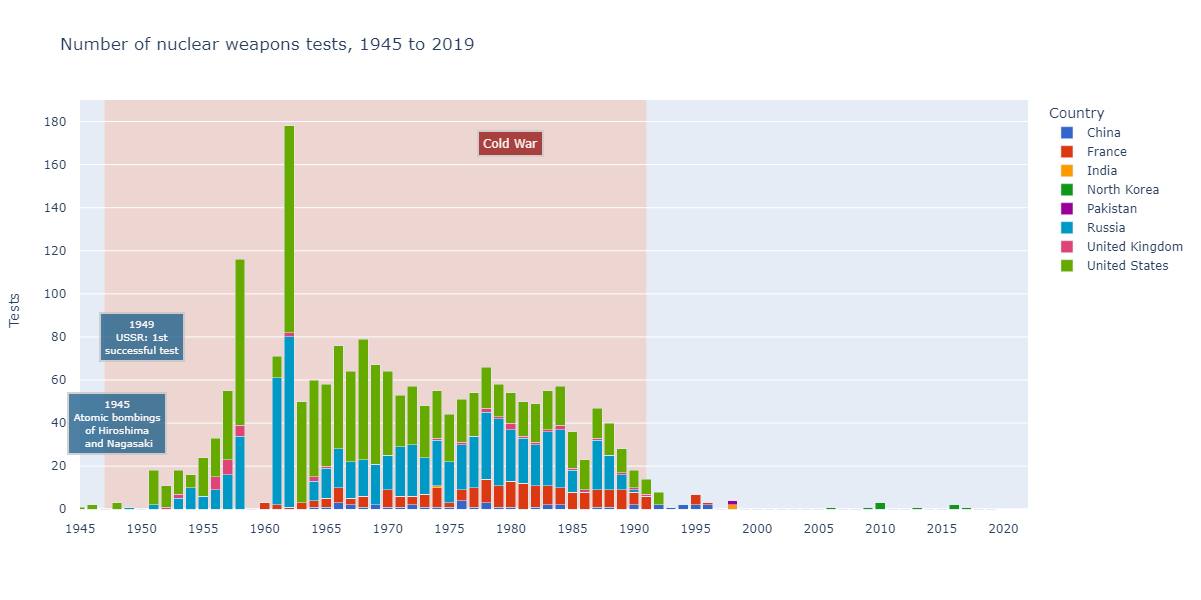

In [179]:
testplot = kbplot()
testplot[1].show()